In [1]:
import numpy as np
from IPython.core.display import display, HTML
import tabulate
display(HTML('<h3>Student: Eduardo S. Ito (RA 159086)</h3>'))
display(HTML('<h3>Student: Thales E. Nazatto (RA 074388)</h3>'))
display(HTML('<h1>Project 2: Evolutionary Computing</h1>'))
from PIL import Image
import os
os.startfile('p2.pdf')

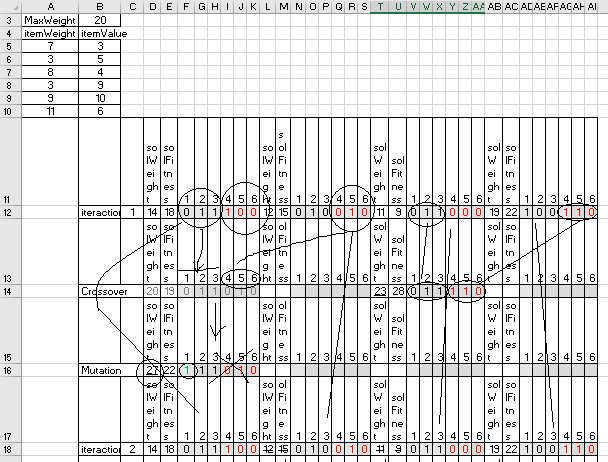

In [2]:
from IPython.core.display import display, HTML
import tabulate
display(HTML('<h2>Initial abstraction</h2>'))
from PIL import Image
path="abstraction.png"
display(HTML('<h3>Objective Function. </h3>'))
display(HTML('<p>The objective function is to fill up knapsack with more valuable products, respecting established maximum\
              weight. Each product has weight and value. The aim is to optimize the filling up of knapsack with more \
              value products and within the maximum weight, as precondition.</p>'))
display(Image.open(path))
display(HTML('<h3>Stop criteria. </h3>'))
display(HTML('<p>The Stop Criteria is reached when maximum value of filled knapsack within maximum weight, \
                 during 3 interactions</p>'))
display(HTML('<h3>References </h3>'))
display(HTML('<p>https://www.youtube.com/watch?v=9kbzMeEBvUY</p>'))

In [1]:
from knapsack.generation import GenerationManager, GenerationStrategy
from knapsack.genetic_algorithm import GeneticAlgorithmFacade
from knapsack.mutation import Mutation, MutationStrategy
from knapsack.problem import KnapsackProblem, ProblemType
from knapsack.reproduction import Reproduction, ReproductionStrategy
from knapsack.selection import Selection, SelectionStrategy

class Config:
    def __init__(self):
        pass


if __name__ == "__main__":
    # GA variables
    generations = 100
    population_size = 100
    crossover_probability = 0.8
    mutation_probability = 0.2

    config=Config
    config.problem=KnapsackProblem(type=ProblemType.MAXIMIZATION,
                    values=[0, 1],
                    costs=[100, 350, 200, 90, 500, 250, 220, 360, 150, 700, 400, 230, 550],
                    weights=[50, 90, 30, 40, 100, 70, 20, 80, 80, 90, 50, 30, 70],
                    cargo=600)
    selection=Selection(config.problem, SelectionStrategy.TOURNAMENT_BATTLE_ROYALE)
    reproduction=Reproduction(ReproductionStrategy.SEXUAL_SINGLE_POINT, crossover_probability)
    mutation=Mutation(MutationStrategy.GENERATIVE, mutation_probability)

    config.generation=GenerationManager(config.problem, GenerationStrategy.EXCHANGE, selection, reproduction, mutation)
    config.population_size=100
    config.generations=100

    GeneticAlgorithmFacade(config).execute()

Generation 1
[0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0] Fitness: 2310 Cost: 2310 Cargo: 430
[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0] Fitness: 1370 Cost: 1370 Cargo: 240
[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1] Fitness: 2060 Cost: 2060 Cargo: 330
[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1] Fitness: 2010 Cost: 2010 Cargo: 330
[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0] Fitness: 2220 Cost: 2220 Cargo: 410
[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1] Fitness: 2190 Cost: 2190 Cargo: 410
[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0] Fitness: 2120 Cost: 2120 Cargo: 440
[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0] Fitness: 1380 Cost: 1380 Cargo: 220
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1] Fitness: 2120 Cost: 2120 Cargo: 400
[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0] Fitness: 1300 Cost: 1300 Cargo: 240
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] Fitness: 750 Cost: 750 Cargo: 100
[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1] Fitness: 2420 Cost: 2420 Cargo: 400
[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1] Fitness: 2230 Cost: 2230 Cargo: 350
[

Generation 3
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1] Fitness: 3160 Cost: 3160 Cargo: 570
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1] Fitness: 3160 Cost: 3160 Cargo: 570
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1] Fitness: 2940 Cost: 2940 Cargo: 550
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1] Fitness: 2940 Cost: 2940 Cargo: 550
[0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1] Fitness: 2910 Cost: 2910 Cargo: 500
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1] Fitness: 3160 Cost: 3160 Cargo: 570
[1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3110 Cost: 3110 Cargo: 540
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1] Fitness: 3160 Cost: 3160 Cargo: 570
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1] Fitness: 3160 Cost: 3160 Cargo: 570
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1] Fitness: 3160 Cost: 3160 Cargo: 570
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1] Fitness: 2940 Cost: 2940 Cargo: 550
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1] Fitness: 3160 Cost: 3160 Cargo: 570
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3260 Cargo: 620
[

Generation 5
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3560 Cargo: 620
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1] Fitness: 2330 Cost: 2330 Cargo: 500
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1] Fitness: 2330 Cost: 2330 Cargo: 500
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: 3330 Cost: 3330 Cargo: 590
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1] Fitness: 2940 Cost: 2940 Cargo: 550
[0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 540
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3560 Cargo: 620
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3390 Cost: 3390 Cargo: 600
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1] Fitness: 2330 Cost: 2330 Cargo: 500
[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: -1 Cost: 3360 Cargo: 640
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3560 Cargo: 620
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1] Fitness: 2330 Cost: 2330 Cargo: 500
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1] Fitness: 2330 Cost: 2330 Cargo: 500
[0, 0, 

Generation 7
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3390 Cost: 3390 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3390 Cost: 3390 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0] Fitness: 2790 Cost: 2790 Cargo: 500
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0] Fitness: 2790 Cost: 2790 Cargo: 500
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0] Fitness: 2790 Cost: 2790 Cargo: 500

Generation 9
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 530
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3480 Cargo: 630
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[

Generation 11
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: -1 Cost: 3470 Cargo: 620
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 580
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: -1 Cost: 3470 Cargo: 620
[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0] Fitness: 2450 Cost: 2450 Cargo: 490
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0] Fitness: 2450 Cost: 2450 Cargo: 490
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0] Fitness: 2450 Cost: 2450 Cargo: 490
[0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 590
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3350 Cost: 3350 Cargo: 570
[0

Generation 13
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3390 Cost: 3390 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 60

Generation 15
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3750 Cargo: 680
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3750 Cargo: 680
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3750 Cargo: 680
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0] Fitness: 2900 Cost: 2900 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3750 Cargo: 680
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1,

Generation 17
[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3340 Cost: 3340 Cargo: 570
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 590
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 60

Generation 19
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1] Fitness: 2650 Cost: 2650 Cargo: 540
[0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1] Fitness: 2650 Cost: 2650 Cargo: 540
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 60

Generation 21
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 600
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3530 Cargo: 660
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 600


Generation 23
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 60

Generation 25
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3130 Cargo: 610
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3130 Cargo: 610
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3750 Cargo: 680
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3130 Cargo: 610
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3130 Cargo: 610
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1

Generation 27
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 590
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 2700 Cost: 2700 Cargo: 50

Generation 29
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 590
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3340 Cost: 3340 Cargo: 570
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 58

Generation 31
[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 590
[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 590
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 590
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 590
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0] Fitness: 2850 Cost: 2850 Cargo: 520
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 60

Generation 33
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0] Fitness: 3070 Cost: 3070 Cargo: 570
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 53

Generation 35
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0] Fitness: -1 Cost: 3200 Cargo: 610
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600


Generation 37
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 2810 Cost: 2810 Cargo: 500
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 2810 Cost: 2810 Cargo: 500
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3240 Cost: 3240 Cargo: 520
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 2810 Cost: 2810 Cargo: 50

Generation 39
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3610 Cargo: 610
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 510
[0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600


Generation 41
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3770 Cargo: 720
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0] Fitness: -1 Cost: 3050 Cargo: 630
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0

Generation 43
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3350 Cost: 3350 Cargo: 560
[0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 570
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0] Fitness: -1 Cost: 3170 Cargo: 620
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 570


Generation 45
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3750 Cargo: 680
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3750 Cargo: 680
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 2910 Cost: 2910 Cargo: 520
[0

Generation 47
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 2850 Cost: 2850 Cargo: 560
[0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 2850 Cost: 2850 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3250 Cargo: 610
[0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 2850 Cost: 2850 Cargo: 560
[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3110 Cost: 3110 Cargo: 510
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600


Generation 49
[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0] Fitness: 3080 Cost: 3080 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 560
[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3700 Cargo: 650
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600


Generation 51
[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3380 Cost: 3380 Cargo: 580
[0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: 2800 Cost: 2800 Cargo: 490
[1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3500 Cost: 3500 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 58

Generation 53
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3510 Cost: 3510 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3510 Cost: 3510 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 60

Generation 55
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3610 Cargo: 610
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3850 Cargo: 670
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3850 Cargo: 670
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 

Generation 57
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3500 Cargo: 620
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fitness: -1 Cost: 3250 Cargo: 630
[0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] Fitness: 3050 Cost: 3050 Cargo: 590
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1] Fitness: 2750 Cost: 2750 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3130 Cargo: 610
[0, 

Generation 59
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1] Fitness: 2790 Cost: 2790 Cargo: 500
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0] Fitness: 3300 Cost: 3300 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0] Fitness: 2970 Cost: 2970 Cargo: 58

Generation 61
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 2900 Cost: 2900 Cargo: 510
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: -1 Cost: 3620 Cargo: 640
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3650 Cargo: 640
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: -1 Cost: 3620 Cargo: 640
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 530
[0, 

Generation 63
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1] Fitness: 2750 Cost: 2750 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3380 Cost: 3380 Cargo: 580
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3530 Cargo: 660
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3530 Cargo: 660
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0

Generation 65
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3770 Cargo: 720
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0] Fitness: 2940 Cost: 2940 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] Fitness: 3240 Cost: 3240 Cargo: 520
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3770 Cargo: 720
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3770 Cargo: 720
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3770 Cargo: 720
[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 3060 Cost: 3060 Cargo: 520
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1,

Generation 67
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3350 Cost: 3350 Cargo: 570
[0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1] Fitness: 2860 Cost: 2860 Cargo: 530
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3350 Cost: 3350 Cargo: 570
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3390 Cost: 3390 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3390 Cost: 3390 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3390 Cost: 3390 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 60

Generation 69
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3520 Cargo: 650
[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1] Fitness: 3080 Cost: 3080 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3520 Cargo: 650
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0

Generation 71
[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3380 Cost: 3380 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3520 Cargo: 650
[0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 2900 Cost: 2900 Cargo: 490
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3520 Cargo: 650
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3350 Cost: 3350 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3520 Cargo: 650
[0, 

Generation 73
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0] Fitness: -1 Cost: 3070 Cargo: 630
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 2900 Cost: 2900 Cargo: 510
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0] Fitness: 3000 Cost: 3000 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3610 Cargo: 610
[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 500
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0

Generation 75
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3850 Cargo: 670
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3850 Cargo: 670
[0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 570
[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0] Fitness: 2400 Cost: 2400 Cargo: 500
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3850 Cargo: 670
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3850 Cargo: 670
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1,

Generation 77
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3510 Cost: 3510 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: 3410 Cost: 3410 Cargo: 540
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3270 Cargo: 620
[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1] Fitness: -1 Cost: 3400 Cargo: 620
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0

Generation 79
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3610 Cargo: 610
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0] Fitness: -1 Cost: 3200 Cargo: 610
[1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3150 Cost: 3150 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1] Fitness: 3130 Cost: 3130 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0

Generation 81
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3520 Cargo: 650
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: -1 Cost: 3470 Cargo: 620
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3850 Cargo: 670
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fitness: -1 Cost: 3470 Cargo: 620
[0, 1,

Generation 83
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3440 Cargo: 640
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1] Fitness: 3250 Cost: 3250 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3440 Cargo: 640
[0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3440 Cargo: 640
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3440 Cargo: 640
[0, 1,

Generation 85
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: -1 Cost: 3620 Cargo: 640
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3750 Cargo: 690
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fitness: -1 Cost: 3620 Cargo: 640
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 

Generation 87
[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 560
[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3700 Cargo: 650
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1] Fitness: 3300 Cost: 3300 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600


Generation 89
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3460 Cargo: 660
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3460 Cargo: 660
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3460 Cargo: 660
[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1] Fitness: -1 Cost: 3460 Cargo: 660
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1,

Generation 91
[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3200 Cost: 3200 Cargo: 550
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0] Fitness: 3050 Cost: 3050 Cargo: 530
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1] Fitness: 3380 Cost: 3380 Cargo: 580
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1] Fitness: -1 Cost: 3530 Cargo: 660


Generation 93
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3750 Cargo: 690
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3750 Cargo: 690
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3750 Cargo: 690
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 

Generation 95
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 560
[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3400 Cost: 3400 Cargo: 570
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1] Fitness: 3000 Cost: 3000 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 60

Generation 97
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1] Fitness: 2930 Cost: 2930 Cargo: 560
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: -1 Cost: 3450 Cargo: 620
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1] Fitness: -1 Cost: 3450 Cargo: 620
[1

Generation 99
[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3100 Cost: 3100 Cargo: 500
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: -1 Cost: 3610 Cargo: 610
[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1] Fitness: -1 Cost: 3400 Cargo: 670
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] Fitness: 3600 Cost: 3600 Cargo: 600
[0